## Requirements:
#### - Clean the data set 
#### - Visualize the following set of information:
##### 1) compare the total number of orders for female is to male.
##### 2) compare the total amount spent for female is to male. 
##### 3) compare the total number of orders for female is to male in each age group. 
##### 4) compare the total amount spend by each age group.
##### 5) compare the total spending of top 8 most spending states. 
##### 6) compare the total amount spent for female is to male according to their martial status.
##### 7) compare the total amount spent for female is to male in each occupation. 
##### 8) visualize the trend of amount spent against age.
##### 9) compare the amount spent on each category of product. 


### Importing the required libraries:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing and understanding the data set:

In [2]:
df = pd.read_csv('SalesData.csv', encoding = 'unicode_escape')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df['Gender'].value_counts()

Gender
F    7842
M    3409
Name: count, dtype: int64

In [7]:
df['Marital_Status'].value_counts()

Marital_Status
0    6522
1    4729
Name: count, dtype: int64

In [8]:
df['Zone'].value_counts()

Zone
Central     4296
Southern    2695
Western     1955
Northern    1491
Eastern      814
Name: count, dtype: int64

In [9]:
df['Product_Category'].value_counts()

Product_Category
Clothing & Apparel       2655
Food                     2493
Electronics & Gadgets    2087
Footwear & Shoes         1064
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 353
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                      100
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: count, dtype: int64

In [10]:
df['State'].value_counts()

State
Uttar Pradesh       1946
Maharashtra         1526
Karnataka           1305
Delhi               1107
Madhya Pradesh       923
Andhra Pradesh       812
Himachal Pradesh     608
Kerala               453
Haryana              452
Bihar                434
Gujarat              429
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: count, dtype: int64

### Data cleaning:

#### renaming columns

In [11]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [12]:
df.columns.str.lower()

Index(['user_id', 'cust_name', 'product_id', 'gender', 'age group', 'age',
       'marital_status', 'state', 'zone', 'occupation', 'product_category',
       'orders', 'amount', 'status', 'unnamed1'],
      dtype='object')

In [13]:
df.columns = df.columns.str.lower()

In [14]:
df.columns

Index(['user_id', 'cust_name', 'product_id', 'gender', 'age group', 'age',
       'marital_status', 'state', 'zone', 'occupation', 'product_category',
       'orders', 'amount', 'status', 'unnamed1'],
      dtype='object')

In [15]:
df.columns.str.replace(' ', '_')

Index(['user_id', 'cust_name', 'product_id', 'gender', 'age_group', 'age',
       'marital_status', 'state', 'zone', 'occupation', 'product_category',
       'orders', 'amount', 'status', 'unnamed1'],
      dtype='object')

In [16]:
df.columns = df.columns.str.replace(' ', '_')

In [17]:
df.head()

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount,status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


#### handling duplicates

In [18]:
df.duplicated(keep = False).sum()

16

In [19]:
df[df.duplicated(keep = False)]

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount,status,unnamed1
18,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568.0,NaN,NaN
19,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568.0,NaN,NaN
4403,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859.0,NaN,NaN
4404,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859.0,NaN,NaN
5702,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088.0,NaN,NaN
5703,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088.0,NaN,NaN
5907,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015.0,NaN,NaN
5908,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015.0,NaN,NaN
6172,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923.0,NaN,NaN
6173,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923.0,NaN,NaN


In [20]:
df.drop_duplicates(keep = 'first', inplace = True)

In [21]:
df.duplicated(keep = False).sum()

0

#### handling null values

In [22]:
df.isna().sum()

user_id                 0
cust_name               0
product_id              0
gender                  0
age_group               0
age                     0
marital_status          0
state                   0
zone                    0
occupation              0
product_category        0
orders                  0
amount                 12
status              11243
unnamed1            11243
dtype: int64

In [23]:
df.drop(columns = ['status', 'unnamed1'], inplace = True)

In [24]:
df.head()

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [25]:
df[df['amount'].isna() == True]

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


##### interpolating the amount column null values using average amount spent by the customer

In [26]:
df[df['user_id'] == 1002092]

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
1485,1002092,Shivangi,P00288942,M,55+,75,0,Bihar,Eastern,Lawyer,Footwear & Shoes,3,16264.0
2589,1002092,Shivangi,P00222242,F,55+,80,1,Maharashtra,Western,Agriculture,Sports Products,1,13195.0
2997,1002092,Shivangi,P00010842,M,55+,81,1,Uttar Pradesh,Central,Agriculture,Footwear & Shoes,1,12282.0
4033,1002092,Shivangi,P00359742,F,55+,64,0,Kerala,Southern,Retail,Electronics & Gadgets,4,10081.0
5332,1002092,Shivangi,P00111842,M,55+,87,0,Uttar Pradesh,Central,IT Sector,Footwear & Shoes,3,8445.0
7273,1002092,Shivangi,P00271142,F,55+,83,1,Kerala,Southern,Lawyer,Clothing & Apparel,2,7008.0
8079,1002092,Shivangi,P00086142,M,55+,68,1,Andhra Pradesh,Southern,IT Sector,Electronics & Gadgets,1,5983.0
8104,1002092,Shivangi,P00109942,F,55+,82,1,Madhya Pradesh,Central,Aviation,Beauty,2,5971.0
8458,1002092,Shivangi,P00246842,F,55+,90,0,Andhra Pradesh,Southern,IT Sector,Clothing & Apparel,1,5436.0


In [27]:
df[df['user_id'] == 1002092]['amount'].mean().round()

8170.0

In [28]:
average = df[df['user_id'] == 1002092]['amount'].mean().round()

In [29]:
df[df['user_id'] == 1002092].fillna(average)

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,8170.0
1485,1002092,Shivangi,P00288942,M,55+,75,0,Bihar,Eastern,Lawyer,Footwear & Shoes,3,16264.0
2589,1002092,Shivangi,P00222242,F,55+,80,1,Maharashtra,Western,Agriculture,Sports Products,1,13195.0
2997,1002092,Shivangi,P00010842,M,55+,81,1,Uttar Pradesh,Central,Agriculture,Footwear & Shoes,1,12282.0
4033,1002092,Shivangi,P00359742,F,55+,64,0,Kerala,Southern,Retail,Electronics & Gadgets,4,10081.0
5332,1002092,Shivangi,P00111842,M,55+,87,0,Uttar Pradesh,Central,IT Sector,Footwear & Shoes,3,8445.0
7273,1002092,Shivangi,P00271142,F,55+,83,1,Kerala,Southern,Lawyer,Clothing & Apparel,2,7008.0
8079,1002092,Shivangi,P00086142,M,55+,68,1,Andhra Pradesh,Southern,IT Sector,Electronics & Gadgets,1,5983.0
8104,1002092,Shivangi,P00109942,F,55+,82,1,Madhya Pradesh,Central,Aviation,Beauty,2,5971.0
8458,1002092,Shivangi,P00246842,F,55+,90,0,Andhra Pradesh,Southern,IT Sector,Clothing & Apparel,1,5436.0


In [30]:
df[df['user_id'] == 1002092] = df[df['user_id'] == 1002092].fillna(average)

In [31]:
df[df['user_id'] == 1002092]

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,8170.0
1485,1002092,Shivangi,P00288942,M,55+,75,0,Bihar,Eastern,Lawyer,Footwear & Shoes,3,16264.0
2589,1002092,Shivangi,P00222242,F,55+,80,1,Maharashtra,Western,Agriculture,Sports Products,1,13195.0
2997,1002092,Shivangi,P00010842,M,55+,81,1,Uttar Pradesh,Central,Agriculture,Footwear & Shoes,1,12282.0
4033,1002092,Shivangi,P00359742,F,55+,64,0,Kerala,Southern,Retail,Electronics & Gadgets,4,10081.0
5332,1002092,Shivangi,P00111842,M,55+,87,0,Uttar Pradesh,Central,IT Sector,Footwear & Shoes,3,8445.0
7273,1002092,Shivangi,P00271142,F,55+,83,1,Kerala,Southern,Lawyer,Clothing & Apparel,2,7008.0
8079,1002092,Shivangi,P00086142,M,55+,68,1,Andhra Pradesh,Southern,IT Sector,Electronics & Gadgets,1,5983.0
8104,1002092,Shivangi,P00109942,F,55+,82,1,Madhya Pradesh,Central,Aviation,Beauty,2,5971.0
8458,1002092,Shivangi,P00246842,F,55+,90,0,Andhra Pradesh,Southern,IT Sector,Clothing & Apparel,1,5436.0


In [32]:
df.head()

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [33]:
df.isna().sum()

user_id              0
cust_name            0
product_id           0
gender               0
age_group            0
age                  0
marital_status       0
state                0
zone                 0
occupation           0
product_category     0
orders               0
amount              11
dtype: int64

##### looping the above process of interpolation to avoid redundant code

In [34]:
df[df['amount'].isna() == True]

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN
464,1004528,Anurag,P00338442,F,26-35,33,1,Uttar Pradesh,Central,Automobile,Food,2,NaN


In [35]:
df_null = df[df['amount'].isna() == True]

In [36]:
df_null

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN
464,1004528,Anurag,P00338442,F,26-35,33,1,Uttar Pradesh,Central,Automobile,Food,2,NaN


In [37]:
for x in df_null.index:
    id = df.loc[x,'user_id']
    average = df[df['user_id'] == id]['amount'].mean()
    df[df['user_id'] == id] = df[df['user_id'] == id].fillna(average)

print('done')

done


In [38]:
df.isna().sum()

user_id             0
cust_name           0
product_id          0
gender              0
age_group           0
age                 0
marital_status      0
state               0
zone                0
occupation          0
product_category    0
orders              0
amount              3
dtype: int64

##### checking the remaining null values in amount column

In [39]:
df[df['amount'].isna() == True]

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
464,1004528,Anurag,P00338442,F,26-35,33,1,Uttar Pradesh,Central,Automobile,Food,2,NaN


In [40]:
df_null = df[df['amount'].isna() == True]

In [41]:
for x in df_null.index:
    id = df_null.loc[x,'user_id']
    print( f' {df_null.loc[x,'cust_name']} = amount total: {df[df['user_id'] == id]['amount'].sum()} ' )

 Sakshi = amount total: 0.0 
 Apoorva = amount total: 0.0 
 Anurag = amount total: 0.0 


##### the following customers have no amount therefore the average cannot be calculated for them, thus dropping those records

In [42]:
df.dropna(inplace = True)

In [43]:
df.isna().sum()

user_id             0
cust_name           0
product_id          0
gender              0
age_group           0
age                 0
marital_status      0
state               0
zone                0
occupation          0
product_category    0
orders              0
amount              0
dtype: int64

#### standardizing marital_status column

In [44]:
df.head()

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [45]:
df['marital_status'].replace(1,'Married')

0              0
1        Married
2        Married
3              0
4        Married
          ...   
11246    Married
11247          0
11248          0
11249          0
11250          0
Name: marital_status, Length: 11240, dtype: object

In [46]:
df['marital_status'] = df['marital_status'].replace(1,'Married')

In [47]:
df.head()

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


In [48]:
df['marital_status'].replace(0,'Not Married')

0        Not Married
1            Married
2            Married
3        Not Married
4            Married
            ...     
11246        Married
11247    Not Married
11248    Not Married
11249    Not Married
11250    Not Married
Name: marital_status, Length: 11240, dtype: object

In [49]:
df['marital_status'] = df['marital_status'].replace(0,'Not Married')

In [50]:
df.head(8)

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Not Married,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Not Married,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0
5,1000588,Joni,P00057942,M,26-35,28,Married,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.0
6,1001132,Balk,P00018042,F,18-25,25,Married,Uttar Pradesh,Central,Lawyer,Auto,4,23841.0
7,1002092,Shivangi,P00273442,F,55+,61,Not Married,Maharashtra,Western,IT Sector,Auto,1,8170.0


### Data analysis and visualization:

#### compare the total number of orders for female is to male

In [51]:
df.head()

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Not Married,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Not Married,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


In [52]:
df.groupby('gender')['orders'].count()

gender
F    7835
M    3405
Name: orders, dtype: int64

In [53]:
df_gender = df.groupby('gender')['orders'].count()

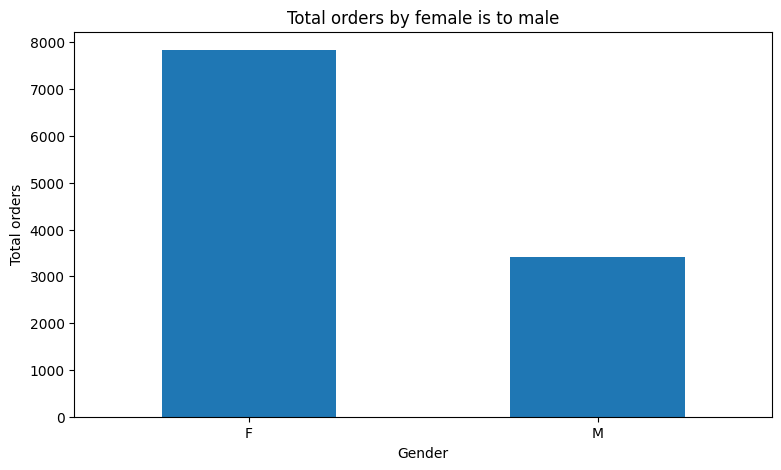

In [54]:
df_gender.plot(kind = 'bar', figsize = (9,5))
plt.xticks(rotation = 0)
plt.xlabel('Gender')
plt.ylabel('Total orders')
plt.title('Total orders by female is to male')
plt.show()

#### compare the total amount spent for female is to male

In [55]:
df.head()

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Not Married,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Not Married,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


In [56]:
df.groupby('gender')['amount'].sum()

gender
F    7.437360e+07
M    3.188852e+07
Name: amount, dtype: float64

In [57]:
df_amount = df.groupby('gender')['amount'].sum()

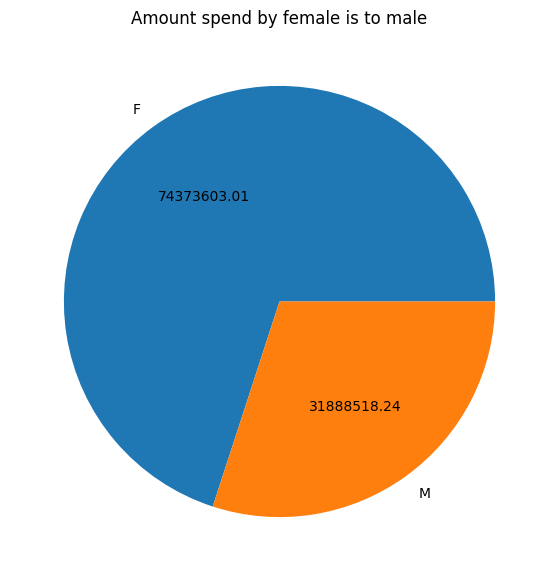

In [58]:
df_amount.plot(kind = 'pie', autopct = lambda p: '{:.2f}'.format(p * sum(df_amount) / 100), figsize = (10,7))
plt.ylabel(None)
plt.title('Amount spend by female is to male')
plt.show()

#### compare the total number of orders for female is to male in each age group

In [59]:
df.head()

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Not Married,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Not Married,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


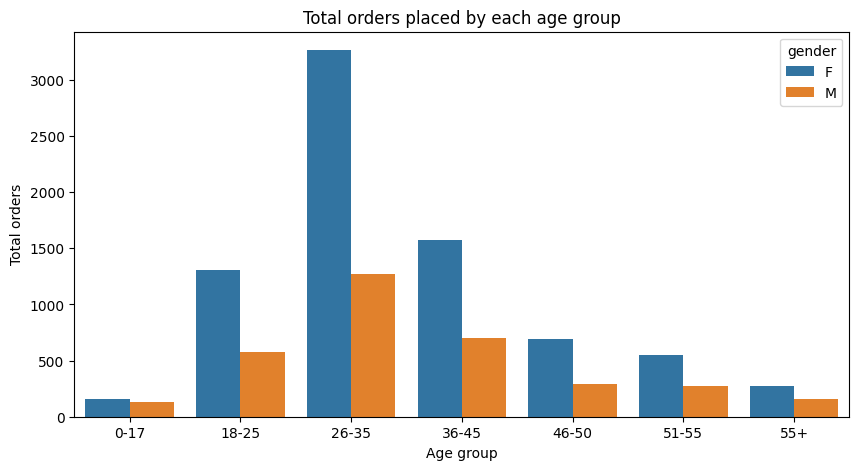

In [60]:
plt.figure(figsize = (10,5))
sns.countplot(data = df.sort_values('age_group'), x = 'age_group', hue = 'gender')
plt.xlabel('Age group')
plt.ylabel('Total orders')
plt.title('Total orders placed by each age group')
plt.show()

#### compare the total amount spend by each age group

In [61]:
df.head()

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Not Married,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Not Married,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


In [62]:
df.groupby('age_group')['amount'].sum()

age_group
0-17     2.699653e+06
18-25    1.723553e+07
26-35    4.259372e+07
36-45    2.215792e+07
46-50    9.229248e+06
51-55    8.256896e+06
55+      4.089157e+06
Name: amount, dtype: float64

In [63]:
df_age_group = df.groupby('age_group')['amount'].sum()

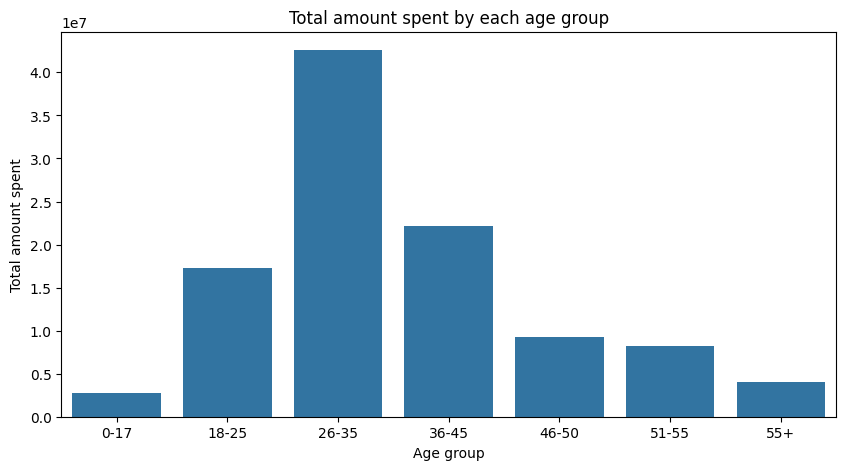

In [64]:
plt.figure(figsize = (10,5))
sns.barplot(data = df_age_group)
plt.xlabel('Age group')
plt.ylabel('Total amount spent')
plt.title('Total amount spent by each age group')
plt.show()

#### compare the total spending of top 8 most spending states 

In [65]:
df.head()

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Not Married,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Not Married,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


In [66]:
df.groupby('state')['amount'].sum().sort_values(ascending = False)

state
Uttar Pradesh       1.935482e+07
Maharashtra         1.441264e+07
Karnataka           1.353389e+07
Delhi               1.161177e+07
Madhya Pradesh      8.121492e+06
Andhra Pradesh      8.041865e+06
Himachal Pradesh    4.963368e+06
Haryana             4.217871e+06
Bihar               4.014669e+06
Gujarat             3.961151e+06
Kerala              3.894492e+06
Jharkhand           3.026456e+06
Uttarakhand         2.520944e+06
Rajasthan           1.909409e+06
Punjab              1.525800e+06
Telangana           1.151490e+06
Name: amount, dtype: float64

In [67]:
df_state = df.groupby('state')['amount'].sum().sort_values(ascending = False).head(8)

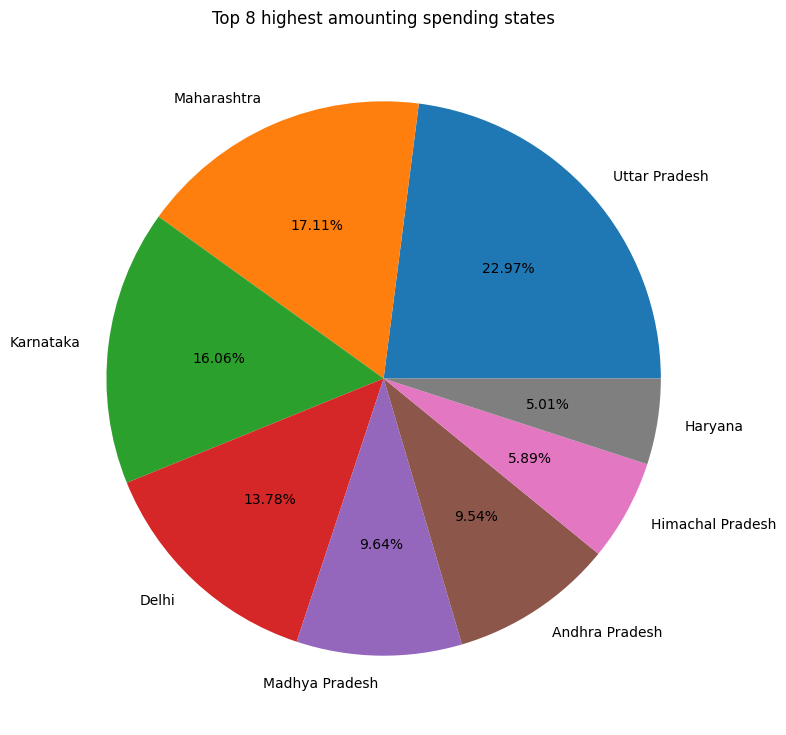

In [68]:
df_state.plot(kind = 'pie', autopct = '%1.2f%%', figsize = (10,9))
plt.ylabel(None)
plt.title('Top 8 highest amounting spending states')
plt.show()

#### compare the total amount spent for female is to male according to their martial status 

In [69]:
df.head()

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Not Married,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Not Married,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


In [70]:
df.groupby(['marital_status', 'gender'], as_index = False)['amount'].sum()

,marital_status,gender,amount
0,Married,F,3.057016e+07
1,Married,M,1.355730e+07
2,Not Married,F,4.380344e+07
3,Not Married,M,1.833122e+07


In [71]:
df_marital_status = df.groupby(['marital_status', 'gender'], as_index = False)['amount'].sum()

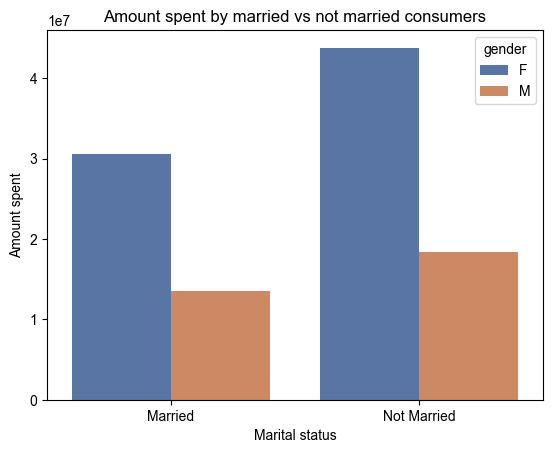

In [72]:
sns.barplot(data = df_marital_status, x = 'marital_status', y = 'amount', hue = 'gender', palette = 'deep')
sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel('Marital status')
plt.ylabel('Amount spent')
plt.title('Amount spent by married vs not married consumers')
plt.show()

#### compare the total amount spent for female is to male in each occupation 

In [73]:
df.head()

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Not Married,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Not Married,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


In [74]:
df['occupation'].value_counts()

occupation
IT Sector          1585
Healthcare         1408
Aviation           1309
Banking            1138
Govt                854
Hospitality         702
Media               637
Automobile          565
Chemical            542
Lawyer              531
Retail              501
Food Processing     423
Construction        413
Textile             350
Agriculture         282
Name: count, dtype: int64

In [75]:
df.groupby(['occupation', 'gender'], as_index = False)['amount'].sum()

,occupation,gender,amount
0,Agriculture,F,1.832394e+06
1,Agriculture,M,7.526050e+05
2,Automobile,F,3.768843e+06
3,Automobile,M,1.599753e+06
4,Aviation,F,9.005089e+06
5,Aviation,M,3.594905e+06
6,Banking,F,7.802649e+06
7,Banking,M,2.978315e+06
8,Chemical,F,3.677037e+06
9,Chemical,M,1.632352e+06


In [76]:
df_occupation = df.groupby(['occupation', 'gender'], as_index = False)['amount'].sum()

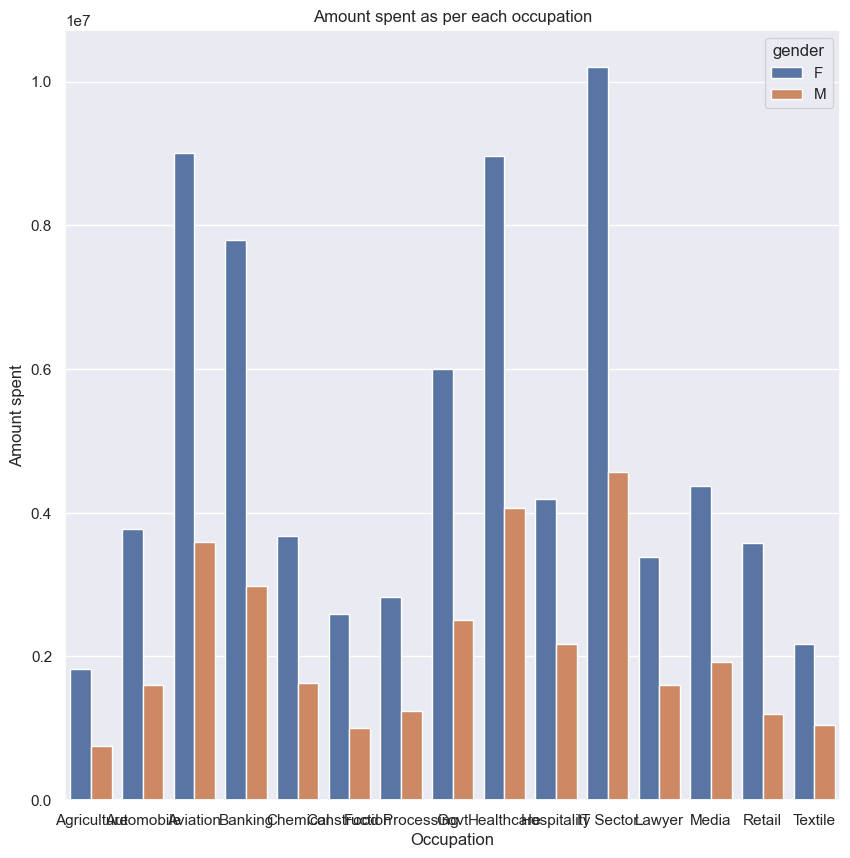

In [77]:
sns.barplot(data = df_occupation, x = 'occupation', y = 'amount', hue = 'gender')
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel('Occupation')
plt.ylabel('Amount spent')
plt.title('Amount spent as per each occupation')
plt.show()

#### visualize the trend of amount spent against age

In [78]:
df.head()

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Not Married,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Not Married,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


In [79]:
df.groupby(['age', 'gender'], as_index = False)['amount'].sum()

,age,gender,amount
0,12,F,311026.0
1,12,M,127936.0
2,13,F,224450.0
3,13,M,236017.0
4,14,F,181507.0
...,...,...,...
156,90,M,13140.0
157,91,F,32188.0
158,91,M,34527.0
159,92,F,23818.0


In [80]:
df_age = df.groupby(['age', 'gender'], as_index = False)['amount'].sum()

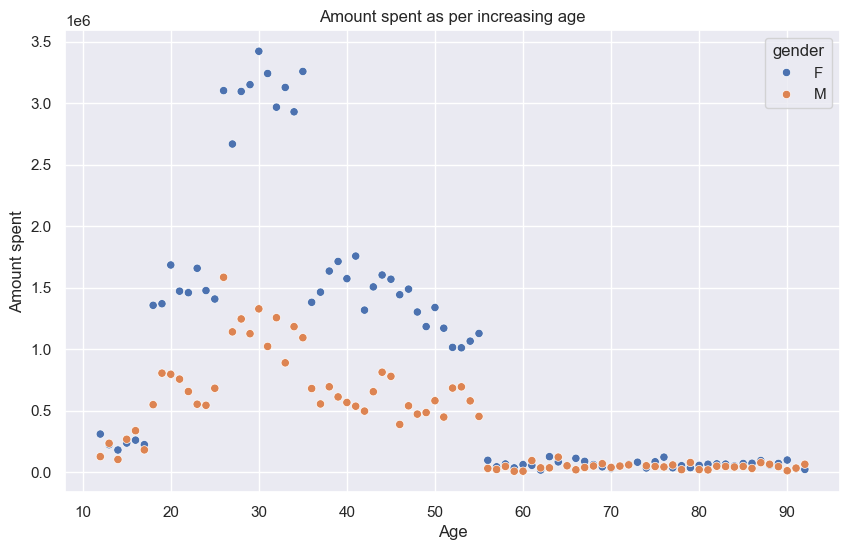

In [81]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_age, x = 'age', y = 'amount', hue = 'gender')
plt.xlabel('Age')
plt.ylabel('Amount spent')
plt.title('Amount spent as per increasing age')
plt.show()

#### compare the amount spent on each category of product 

In [82]:
df.head()

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Not Married,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Not Married,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


In [83]:
df.groupby('product_category', as_index = False)['amount'].sum()

,product_category,amount
0,Auto,1.954263e+06
1,Beauty,1.959484e+06
2,Books,1.061478e+06
3,Clothing & Apparel,1.648447e+07
4,Decor,7.303600e+05
5,Electronics & Gadgets,1.560766e+07
6,Food,3.395666e+07
7,Footwear & Shoes,1.560455e+07
8,Furniture,5.452005e+06
9,Games & Toys,4.331694e+06


In [84]:
df_product = df.groupby('product_category', as_index = False)['amount'].sum()

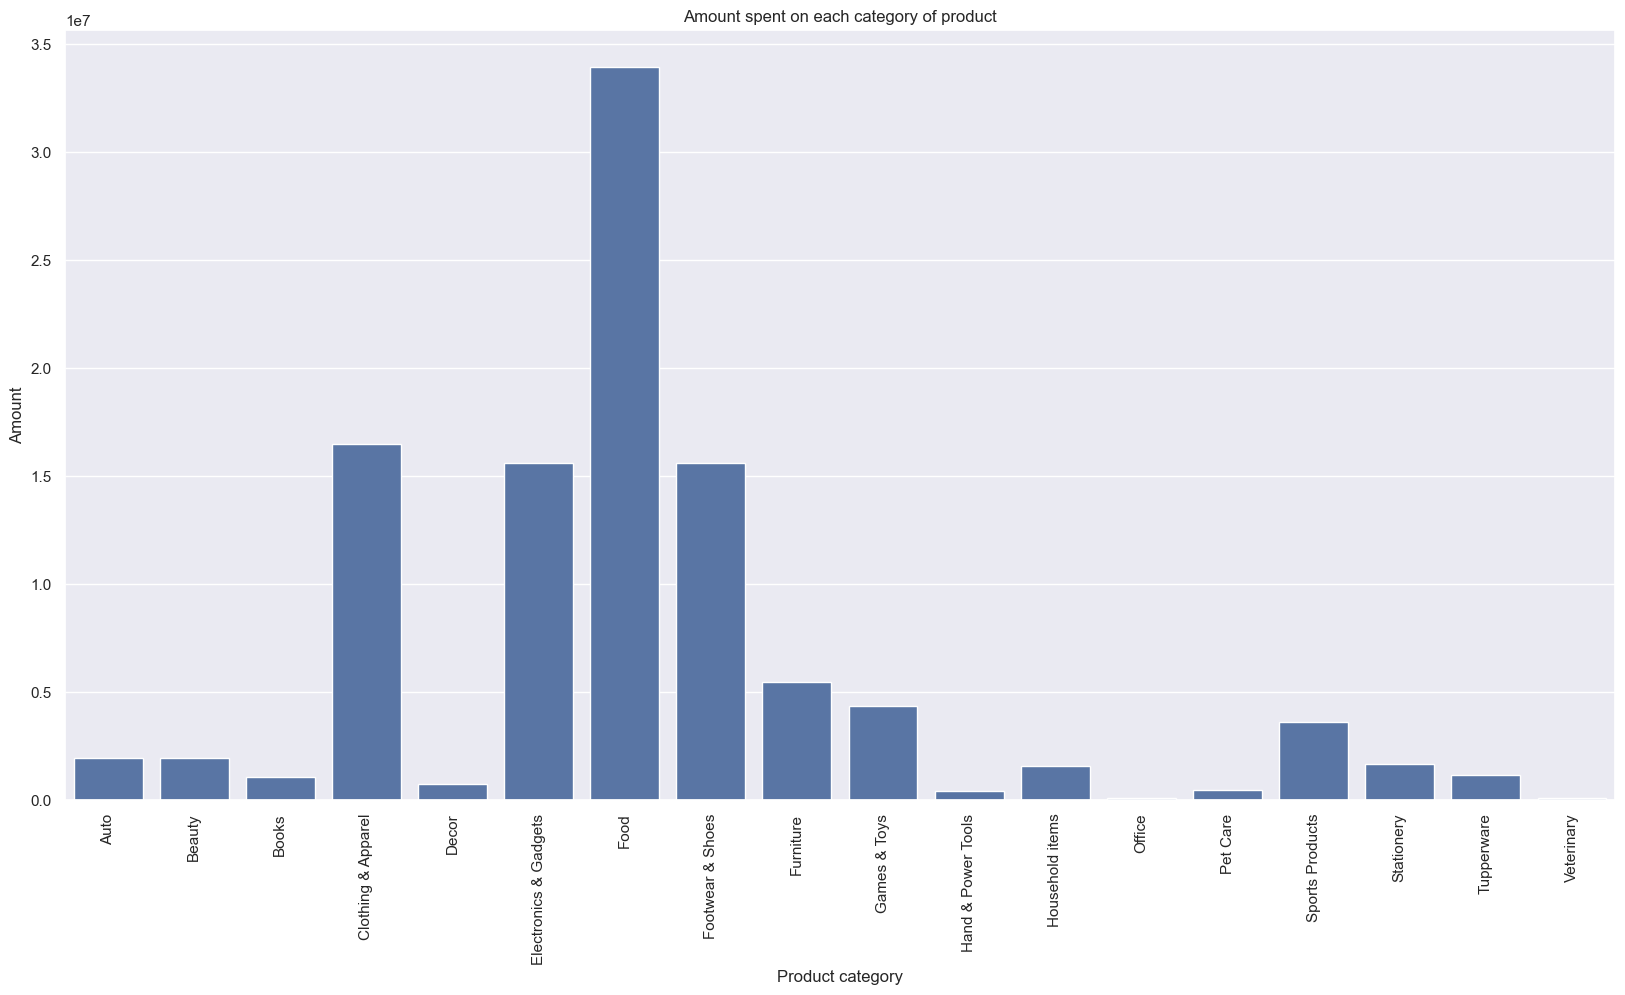

In [85]:
plt.xticks(rotation = 90)
sns.barplot(data = df_product, x = 'product_category', y = 'amount')
sns.set(rc={'figure.figsize':(20,8)})
plt.xlabel('Product category')
plt.ylabel('Amount')
plt.title('Amount spent on each category of product')
plt.show()